In [57]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine) 

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())

In [32]:
#set full results in dataframe
precip_analysis = pd.DataFrame(results)
precip_analysis.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [65]:
# Calculate the date 1 year ago from the last data point in the database
max_date = precip_analysis['date'].max()
print(f'Latest date is {max_date}.')
max_datetime = datetime.strptime(max_date, '%Y-%m-%d')
one_year = max_datetime - timedelta(days=365)
print(f'The date for one year previous is {one_year}.')

Latest date is 2017-08-23.
The date for one year previous is 2016-08-23 00:00:00.


In [70]:
# Perform a query to retrieve the data and precipitation scores from one year
filter_results = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > '2016-08-23').\
                    order_by(Measurement.date).all()

In [79]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(filter_results)
precip = precip.fillna(value=0, axis=1)
date_precip = precip.set_index('date')
date_precip.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


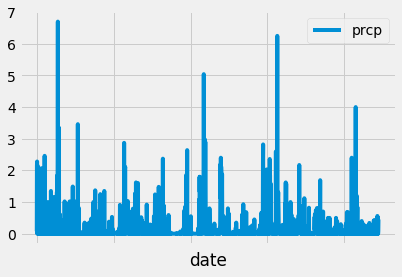

In [80]:
# Use Pandas Plotting with Matplotlib to plot the data
precip.plot(x='date', y='prcp')

In [82]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
precip.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [84]:
# Design a query to show how many stations are available in this dataset
station_count = session.query(Station).distinct(Station.name).count()
station_count

9

In [108]:
# What are the most active stations? (i.e. what stations have the most rows)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
active.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
#station with highest number of observations
highest = list(active[0])
high_obs = highest[0]
high_obs

'USC00519281'